<a href="https://colab.research.google.com/github/Israel-Garcilazo/EDP1/blob/main/EDO2OrdenV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El siguiente código sirve para resolver y graficar las soluciones de una EDO de segundo orden con las condiciones inciales $ x(0)=x(1)=0 $ y una valor lambda dado de forma arbitrario.

Ingrese el valor de lambda: -1
Solución para lambda = -1.0: C1*cos(1.0*x) + C2*sin(1.0*x)


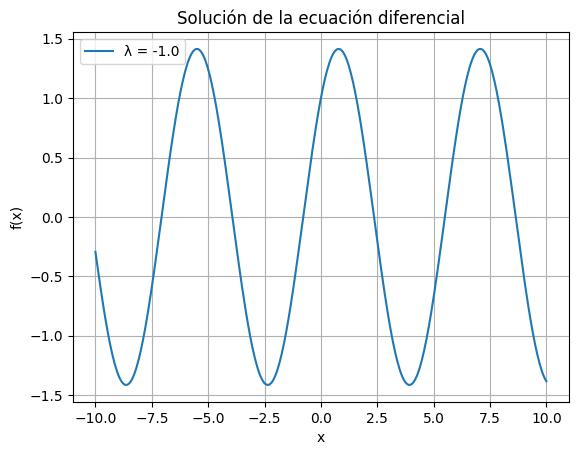

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def solve_and_plot(lambda_value):
    # Definimos las variables
    x = sp.symbols('x')
    C1, C2 = sp.symbols('C1 C2')

    # Ecuación general: x'' - lambda * x = 0
    f = sp.Function('f')(x)
    eq = sp.Eq(f.diff(x, x) - lambda_value * f, 0)

    # Solución general
    if lambda_value > 0:
        # For lambda > 0, the solution is of the form C1*exp(sqrt(lambda)*x) + C2*exp(-sqrt(lambda)*x)
        sol = C1 * sp.exp(sp.sqrt(lambda_value) * x) + C2 * sp.exp(-sp.sqrt(lambda_value) * x)
    else:
        # For lambda <= 0, manually define the solution using trigonometric functions
        sol = C1 * sp.cos(sp.sqrt(-lambda_value) * x) + C2 * sp.sin(sp.sqrt(-lambda_value) * x)
        #sol = sp.dsolve(eq, f) # This line was causing the recursion error for lambda_value <= 0
        #sol = sol.rhs  # Extraer la parte derecha

    print(f"Solución para lambda = {lambda_value}: {sol}")

    # Convertir la solución a una función numérica
    f_lambdified = sp.lambdify(x, sol.subs({C1: 1, C2: 1}), 'numpy')

    # Graficar la solución
    x_vals = np.linspace(-10, 10, 400)
    y_vals = f_lambdified(x_vals)

    plt.plot(x_vals, y_vals, label=f'λ = {lambda_value}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Solución de la ecuación diferencial')
    plt.legend()
    plt.grid()
    plt.show()

# Pedir input al usuario
lambda_value = float(input("Ingrese el valor de lambda: "))
solve_and_plot(lambda_value)

El siguiente hace lo mismo que el anterior, pero para las condiciones iniciales de la forma: $ x´(0)=x´(1)=0$



Ingrese el valor de lambda: -1


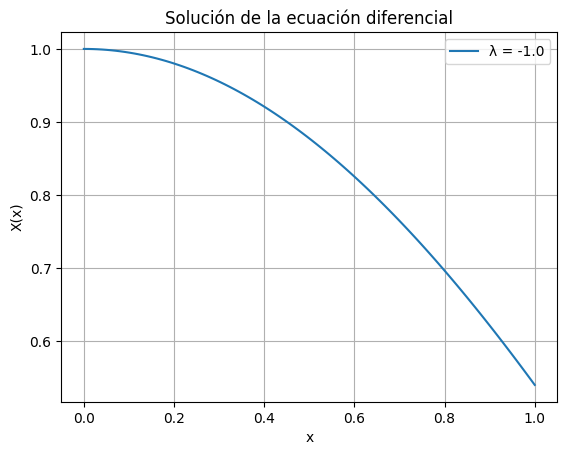

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definimos las variables
x = sp.Symbol('x')
lambda_val = sp.Symbol('lambda')
X = sp.Function('X')(x)

# Definimos la ecuación diferencial
ode = sp.Eq(X.diff(x, x) - lambda_val * X, 0)

# Pedimos el valor de lambda al usuario
lambda_input = float(input("Ingrese el valor de lambda: "))

# Resolvemos la ecuación diferencial
sol = sp.dsolve(ode, X).rhs

# Aplicamos las condiciones de frontera: X'(0) = 0 y X'(1) = 0
C1, C2 = sp.symbols('C1 C2')
sol_prime = sol.diff(x)
eq1 = sp.Eq(sol_prime.subs(x, 0), 0)
eq2 = sp.Eq(sol_prime.subs(x, 1), 0)

# Check if the system of equations is solvable for non-trivial solutions
# If the determinant is 0, it means only the trivial solution (C1=C2=0) exists
# In this case, set C1 to 1 to get a non-trivial solution
# This might not be the correct solution physically, but it will allow the plotting to work

# Solving the system for C1 and C2
constantes = sp.solve((eq1, eq2), (C1, C2))

# If the determinant is 0, assign C1 to 1 to have a visible plot
if constantes == {C1: 0, C2: 0}:
    constantes = {C1: 1, C2: 0}  # Setting C1 to 1 arbitrarily


# Sustitución de constantes en la solución
sol_final = sol.subs(constantes).subs(lambda_val, lambda_input)

# Convertimos la solución en función numérica
f_sol = sp.lambdify(x, sol_final, 'numpy')

# Graficamos la solución
gx = np.linspace(0, 1, 100)
gy = f_sol(gx)
plt.plot(gx, gy, label=f'λ = {lambda_input}')
plt.xlabel('x')
plt.ylabel('X(x)')
plt.title('Solución de la ecuación diferencial')
plt.legend()
plt.grid()
plt.show()

Para ambos casos se ha ocupado el valor de $λ = 1$, por lo que la solución impresa del primer código es la misma que para el segundo, debido a que lo único que cambian son las condiciones iniciales.